# Finding stations with most data / longest time coverage

Here you will take a 4-d (lat-lon-depth-time) dataset and find out those locations in whose proximity most observational data exist.
This is good if you want to know the best locations for model validation.

## Reading in ICES data
First, we read in the data from the ICES database which we previously downloaded.

In [698]:
setwd("/silos/notebook_collection/obsdata_hydrography/find_stations/")
icesdata = read.csv("/data/obs/ices_ts/ts_1877-2018.csv", sep=";")
head(icesdata)

latitude,longitude,depth,salinity,temperature,date,datetime
60.1367,19.303,0,5.39,12.5,1877-07-22,-8196
60.1367,19.303,5,5.39,11.8,1877-07-22,-8196
60.1367,19.303,10,5.53,9.4,1877-07-22,-8196
60.1367,19.303,15,5.89,3.4,1877-07-22,-8196
60.1367,19.303,20,6.04,3.3,1877-07-22,-8196
60.1367,19.303,30,6.81,1.0,1877-07-22,-8196


In [703]:
lonrange=c(-5,31)
latrange=c(50,67)
icesdata = icesdata[icesdata$latitude > latrange[1],]
icesdata = icesdata[icesdata$latitude < latrange[2],]
icesdata = icesdata[icesdata$longitude > lonrange[1],]
icesdata = icesdata[icesdata$longitude < lonrange[2],]

In [704]:
icesdata$year = as.numeric(format(as.Date(icesdata$date),"%Y"))

## Defining boxes

Let us define a grid over North Sea and Baltic Sea so we can see in which boxes there are the most observations.

In [705]:
dlon = 0.2
dlat = 0.1
min(icesdata$lon)

[1] -4.9998

We define two axes with the given spacing.

In [706]:
xstart = seq(from=lonrange[1],to=lonrange[2],by=dlon)
ystart = seq(from=latrange[1],to=latrange[2],by=dlat)

We calculate the longitude and latitude index on this axis for all observations.

In [707]:
icesdata$latindex = floor((icesdata$latitude - latrange[1])/dlat)+1
icesdata$lonindex = floor((icesdata$longitude - lonrange[1])/dlon)+1

We see how many observations are there for each year and box.

In [708]:
data_in_box = aggregate(icesdata[,c("salinity")], by=list(lonindex=icesdata$lonindex,latindex=icesdata$latindex,year=icesdata$year), FUN=length)

We aggregate this again to see for how many years there are any measurements, and how many measurements are in this box in total.

In [709]:
years_in_box = aggregate(data_in_box[,c("year")], by=list(lonindex=data_in_box$lonindex,latindex=data_in_box$latindex), FUN=length)

In [710]:
measurements_in_box = aggregate(data_in_box[,c("x")], by=list(lonindex=data_in_box$lonindex,latindex=data_in_box$latindex), FUN=sum)

We merge these two data.frames to see in how many boxes there are at least 500 observations from at least 50 years.

In [711]:
measurements_in_box$years = years_in_box$x
measurements_in_box$rank = -1

In [712]:
myrank = 1
measurements_in_box$rank[(measurements_in_box$years>80) & (measurements_in_box$x > 15000) & (measurements_in_box$rank==-1)]=myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 1: 6 stations"


In [713]:
myrank = 2
measurements_in_box$rank[(measurements_in_box$years>75) & (measurements_in_box$x > 10000) & (measurements_in_box$rank==-1)]=myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 2: 12 stations"


In [714]:
myrank = 3
measurements_in_box$rank[(measurements_in_box$years>70) & (measurements_in_box$x > 8000) & (measurements_in_box$rank==-1)]=myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 3: 8 stations"


In [715]:
myrank = 4
measurements_in_box$rank[(measurements_in_box$years>65) & (measurements_in_box$x > 7000) & (measurements_in_box$rank==-1)]=myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 4: 8 stations"


In [716]:
myrank = 5
measurements_in_box$rank[(measurements_in_box$years>60) & (measurements_in_box$x > 7000) & (measurements_in_box$rank==-1)]=myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 5: 7 stations"


In [717]:
myrank = 6
measurements_in_box$rank[(measurements_in_box$years>55) & (measurements_in_box$x > 7000) & (measurements_in_box$rank==-1)]=myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 6: 5 stations"


In [718]:
myrank = 7 # Southern North Sea only
measurements_in_box$rank[(measurements_in_box$years>20) & (measurements_in_box$x > 1500) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]<7.5) & (xstart[measurements_in_box$lonindex]>0) &
                        (ystart[measurements_in_box$latindex]<57.5)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 11 stations"


In [719]:
myrank = 7 # Gulf of Riga
measurements_in_box$rank[(measurements_in_box$years>30) & (measurements_in_box$x > 1800) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>22.0) &
                        (ystart[measurements_in_box$latindex]<58.5)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 13 stations"


In [720]:
myrank = 7 # Northern Baltic
measurements_in_box$rank[(measurements_in_box$years>60) & (measurements_in_box$x > 4000) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>15.0) &
                        (ystart[measurements_in_box$latindex]>59.0)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 15 stations"


In [721]:
myrank = 7 # Very Northern Baltic
measurements_in_box$rank[(measurements_in_box$years>55) & (measurements_in_box$x > 3000) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>15.0) &
                        (ystart[measurements_in_box$latindex]>60.0)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 19 stations"


In [722]:
myrank = 7 # Southern Baltic
measurements_in_box$rank[(measurements_in_box$years>65) & (measurements_in_box$x > 4000) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>10.0) &
                        (ystart[measurements_in_box$latindex]<55.0)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 21 stations"


In [723]:
myrank = 7 # Very southern Baltic Sea
measurements_in_box$rank[(measurements_in_box$years>50) & (measurements_in_box$x > 1500) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>10.0) &
                        (ystart[measurements_in_box$latindex]<54.5)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 23 stations"


In [724]:
myrank = 7 # German Bight
measurements_in_box$rank[(measurements_in_box$years>35) & (measurements_in_box$x > 900) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>6.0) & (xstart[measurements_in_box$lonindex]<9.5) &
                        (ystart[measurements_in_box$latindex]>53.0) & (ystart[measurements_in_box$latindex]<55.0)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 25 stations"


In [725]:
myrank = 7 # Western North Sea
measurements_in_box$rank[(measurements_in_box$years>35) & (measurements_in_box$x > 1500) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>-2.0) & (xstart[measurements_in_box$lonindex]<5.0) &
                        (ystart[measurements_in_box$latindex]>53.0) & (ystart[measurements_in_box$latindex]<56.5)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 28 stations"


In [726]:
myrank = 7 # Jütland west coast
measurements_in_box$rank[(measurements_in_box$years>30) & (measurements_in_box$x > 1300) & (measurements_in_box$rank==-1)&
                        (xstart[measurements_in_box$lonindex]>5) & (xstart[measurements_in_box$lonindex]<8) &
                        (ystart[measurements_in_box$latindex]>56.0) & (ystart[measurements_in_box$latindex]<57.5)] = myrank
print(paste0("rank ",myrank,": ",sum(measurements_in_box$rank==myrank)," stations"))
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] == myrank) {
        for (j in seq_len(nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] == -1) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 5) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 5) {
                        measurements_in_box$rank[j]=0
                    }
                }
            }
        }
    }
}

[1] "rank 7: 30 stations"


Kick out neighbours, keeping the longer record.

In [727]:
for (i in seq_len(nrow(measurements_in_box))) {
    if (measurements_in_box$rank[i] > 0) {
        for (j in seq(from=i+1,to=nrow(measurements_in_box))) {
            if (measurements_in_box$rank[j] > 0) {
                if (abs(measurements_in_box$latindex[i]-measurements_in_box$latindex[j]) < 3) {
                    if (abs(measurements_in_box$lonindex[i]-measurements_in_box$lonindex[j]) < 3) {
                        if (measurements_in_box$years[i] > measurements_in_box$years[j]) {
                            measurements_in_box$rank[j] = -1
                        } else {
                            measurements_in_box$rank[i] = -1
                        }
                    }
                }
            }
        }
    }
}

Let us plot where these boxes are.

Warning message:
"Removed 28784 rows containing missing values (geom_path)."Warning message:
"Removed 9347 rows containing missing values (geom_path)."

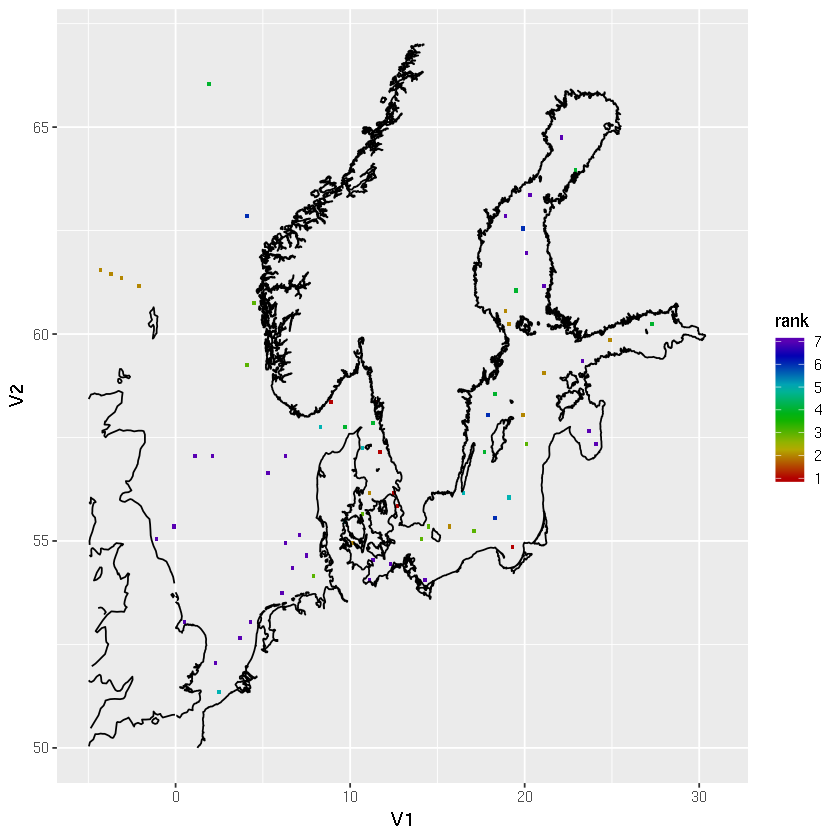

In [728]:
boxes_to_plot = measurements_in_box[measurements_in_box$rank>0,]
boxes_to_plot$xmin = xstart[boxes_to_plot$lonindex]
boxes_to_plot$xmax = xstart[boxes_to_plot$lonindex]+dlon
boxes_to_plot$ymin = ystart[boxes_to_plot$latindex]
boxes_to_plot$ymax = ystart[boxes_to_plot$latindex]+dlat
coastline=read.csv("coastline_world.txt",sep="",header=FALSE)
coastline_baltic=read.csv("coastline_baltic.txt",sep="",header=FALSE)
library(ggplot2)
ggplot()+
  geom_rect(data=boxes_to_plot,mapping=aes(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,fill=rank))+
  scale_fill_gradientn(colors=rainbow(100,end = 0.75,v=0.7))+
  geom_path(data=coastline[coastline$V1<0,],mapping=aes(x=V1,y=V2))+
  geom_path(data=coastline_baltic,mapping=aes(x=V1,y=V2))+
  scale_x_continuous(limits = lonrange)+
  scale_y_continuous(limits = latrange)
  

Now we need to get the coordinates where the most frequent observations were made.

In [757]:
calculate_mode <- function(x) { # this function finds the most frequent value
  uniqx <- unique(na.omit(x))
  uniqx[which.max(tabulate(match(x, uniqx)))]
}
boxes_to_plot$longitude = NA
boxes_to_plot$latitude  = NA
for (i in seq_len(nrow(boxes_to_plot))) {
    mydata = icesdata[(icesdata$latindex == boxes_to_plot$latindex[i]) &  (icesdata$lonindex == boxes_to_plot$lonindex[i]),]
    mydata$mylatlon = mydata$latitude+mydata$longitude*0.001
    most_frequent_value = sort(table(mydata$latlon),decreasing=TRUE)[1]
    most_frequent_value = calculate_mode(mydata$mylatlon)
    myindex = which(mydata$mylatlon==most_frequent_value)[1]
    boxes_to_plot$latitude[i]=mydata$latitude[myindex]
    boxes_to_plot$longitude[i]=mydata$longitude[myindex]
}

Now let us find the names of the five closest stations from the ICES station name table

In [760]:
stations=read.csv2("Station_2017-07-31-03-55.tab", sep="\t",stringsAsFactors=FALSE)
head(stations)
stations$Station_Latitude = as.numeric(stations$Station_Latitude)
stations$Station_Longitude = as.numeric(stations$Station_Longitude)

Station,Header,Station_Code,Station_Country,Station_Name,Station_LongName,Station_ActiveFromDate,Station_ActiveUntilDate,Station_ProgramGovernance,Station_StationGovernance,...,Station_Latitude,Station_LatitudeRange,Station_Longitude,Station_LongitudeRange,Station_Geometry,Station_DataType,Station_WLTYP,Station_MSTAT,Station_Notes,Station_Deprecated
Station,Record,1,BE,BCP,,1997,,O,1578,...,51.33333,0.00266,2.83333,0.00266,,CF,MO,B,Center of the area sampled as the Belgian Continental Plat.,false
Station,Record,2,BE,DVZ_J99,,1977,,O,1578,...,53.25000,0.00267,2.50000,0.00267,,,MO,B,,false
Station,Record,3,BE,DVZ_KNO,,1997,,O,1478,...,51.36483,0.00266,3.33500,0.00267,,CF,C,B,For collection of mussels.,false
Station,Record,4,BE,DVZ_NWP,,1997,,O,1478,...,51.15600,0.00267,2.73067,0.00267,,CF,C,B,For collection of mussels.,false
Station,Record,5,BE,DVZ_OS,,1977,,O,1578,...,51.37500,0.00267,3.76667,0.00267,,,CE,B,,false
Station,Record,6,BE,DVZ_OST,,1997,,O,1478,...,51.24183,0.00266,2.93100,0.00267,,CF,C,B,For collection of mussels.,false


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [766]:
for (i in seq_len(nrow(boxes_to_plot))) {
    stations$dist_squared = (stations$Station_Latitude-boxes_to_plot$latitude[i])^2 + 
                            (stations$Station_Longitude-boxes_to_plot$longitude[i])^2*(cos(boxes_to_plot$longitude[i]*pi/180))^2
    five_nearest_stations = stations[order(stations$dist_squared)[1:9],]
    boxes_to_plot$station1[i] = five_nearest_stations$Station_Name[1]
    boxes_to_plot$station2[i] = five_nearest_stations$Station_Name[2]
    boxes_to_plot$station3[i] = five_nearest_stations$Station_Name[3]
    boxes_to_plot$station4[i] = five_nearest_stations$Station_Name[4]
    boxes_to_plot$station5[i] = five_nearest_stations$Station_Name[5]
    boxes_to_plot$station6[i] = five_nearest_stations$Station_Name[6]
    boxes_to_plot$station7[i] = five_nearest_stations$Station_Name[7]
    boxes_to_plot$station8[i] = five_nearest_stations$Station_Name[8]
    boxes_to_plot$station9[i] = five_nearest_stations$Station_Name[9]
    boxes_to_plot$stationdist1[i] = sqrt(five_nearest_stations$dist_squared[1])*60
    boxes_to_plot$stationdist2[i] = sqrt(five_nearest_stations$dist_squared[2])*60
    boxes_to_plot$stationdist3[i] = sqrt(five_nearest_stations$dist_squared[3])*60
    boxes_to_plot$stationdist4[i] = sqrt(five_nearest_stations$dist_squared[4])*60
    boxes_to_plot$stationdist5[i] = sqrt(five_nearest_stations$dist_squared[5])*60
    boxes_to_plot$stationdist6[i] = sqrt(five_nearest_stations$dist_squared[6])*60
    boxes_to_plot$stationdist7[i] = sqrt(five_nearest_stations$dist_squared[7])*60
    boxes_to_plot$stationdist8[i] = sqrt(five_nearest_stations$dist_squared[8])*60
    boxes_to_plot$stationdist9[i] = sqrt(five_nearest_stations$dist_squared[9])*60
    print(paste0(i," = ",boxes_to_plot$station1[i], "(",boxes_to_plot$stationdist1[i]," n.m.) / ",
                         boxes_to_plot$station2[i], "(",boxes_to_plot$stationdist2[i]," n.m.) / ",
                         boxes_to_plot$station3[i], "(",boxes_to_plot$stationdist3[i]," n.m.) / ",
                         boxes_to_plot$station4[i], "(",boxes_to_plot$stationdist4[i]," n.m.)"))
}

[1] "1 = 315(3.53137121533489 n.m.) / 420(4.74298307589353 n.m.) / 421(6.0299999999998 n.m.) / W06(7.0859120646644 n.m.)"
[1] "2 = Anglia_AnOpenSea_fi01(0.223092883461483 n.m.) / Anglia_AnOpenSea_se02(0.223092883461483 n.m.) / Anglia_AnOpenSea_wa02(0.223092883461483 n.m.) / Anglia_AnOpenSea_wa03(13.875248956487 n.m.)"
[1] "3 = NOORDWK70(9.2329733994367 n.m.) / NOORDWK50(12.3039522384602 n.m.) / CALLOG70(20.4495563304372 n.m.) / FOE-N03(21.3863557977581 n.m.)"
[1] "4 = HumWash_HWInter_wa02(2.24381933109224 n.m.) / HumWash_HWInter_fi03(2.24889154709212 n.m.) / HumWash_Owash_se01(7.6792657523251 n.m.) / HumWash_Owash_se04(8.91907454602056 n.m.)"
[1] "5 = CALLOG30(8.213848415543 n.m.) / CALLOG10(13.7302500859493 n.m.) / HOLLSKZNND(15.9098341070379 n.m.) / KUSTZNE(17.702209707044 n.m.)"
[1] "6 = FOE-N42(12.8721872407166 n.m.) / BRGRU(12.893945367877 n.m.) / ZOUTKPLZGT(17.6982586477875 n.m.) / BSH-32(17.7480917196211 n.m.)"
[1] "7 = LUEBU(0.838244097436123 n.m.) / OMMVZBA20(2.6650223336547 n

In [133]:
getwd()

[1] "/home/nis/radtke"